#### CSE 452: Neural Networks and Fuzzy Systems Lab
Summer-2020, Dept. of CSE, NEUB <br>

#### Student Info
<b>Name:</b> Gulam Kibria Chowdhury<br>
<b>Reg. No:</b> 170103020033

### Assignment 4: Radial Basis Function Network

In [1]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import numpy as np

<b>Dataset</b> <br>
Here,<br>
Training data shape is (NxD) 

In [2]:
np.random.seed(50)
X, y = make_moons(n_samples=500, noise=0.1)

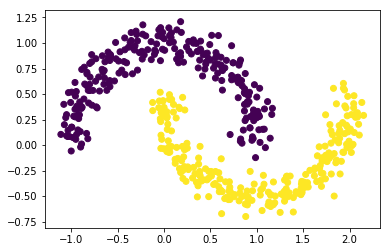

In [3]:
plt.scatter(X[:,0], X[:,1] ,c=y )

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
print('Train shape: ', X_train.shape, y_train.shape)
print('Test shape: ',X_test.shape, y_test.shape)

Train shape:  (400, 2) (400,)
Test shape:  (100, 2) (100,)


<b>Task 1: Calculate Hidden Neuron Centroids</b>

K=12 <br>
Calculate Centroids using K-Means. <br>
Centroids shape should be (KxD) <br>
Print and plot the centroids with the data.

In [5]:
#your code goes here.
#print(X_train)
#print(y_train)


def get_random_centroids(k):
    cent={}
    while True:
        ri=np.random.choice(range(len(X_train)), k)
        if len(set(ri))==k:  #found distinct k indexes.
            for i in range(k):
                cent[i]=X_train[ri[i]]
            break
    return cent



def euclidianDistance(arr,c):
    return np.sqrt((arr[0]-c[0])**2+(arr[1]-c[1])**2)



def grouping(cent):
    gpp={}
    for i in range(0,len(cent)):
        gpp[i]=[]
        
    sz = len(X_train)
    for i in range(sz):
        data = X_train[i]
        idx,mn=0,9999999.00
        for j in range(0,len(cent)):
            dis=euclidianDistance(data,cent[j])
            if mn>dis:
                mn,idx=dis,j
        gpp[idx].append(data)
        #print(gpp)
    return gpp;



def average(grp):
    sz = len(grp)
    left=0
    right=0
    for i in range(0,sz):
        t = grp[i]
        left+=t[0]
        right+=t[1]
    c = [left/sz,right/sz]
    return c



def ploting(centroids):
        plt.scatter(X_train[:,0], X_train[:,1] ,c=y_train)
        ax = plt.axes()
        ax.set_facecolor("grey")
        for i in range(0,len(centroids)):
            plt.scatter(centroids[i][0], centroids[i][1], color='r', marker='*')
        plt.show()
        



 For K =  12 

Ccentroids ->

 {0: [1.9708132856549214, 0.2098576249362328], 1: [0.4432535684176751, 0.8651464981504392], 2: [-0.5973160473075472, 0.7771440299519791], 3: [1.7345049900103953, -0.19793998912851182], 4: [1.2820784142163617, -0.4699402145476223], 5: [0.2629978088935758, -0.2078681526799525], 6: [0.7861825692430094, 0.6479394823015775], 7: [-0.9212673125593375, 0.3059359681288326], 8: [-0.05422272236417611, 1.0038043998324766], 9: [0.9657251347066944, 0.23775941174244325], 10: [0.7462005337133027, -0.4717196923828424], 11: [0.027256596424215133, 0.3207712466757633]}


C:\Users\G.K\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


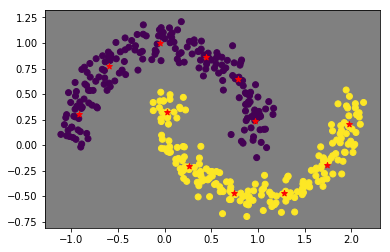

In [6]:

k=12
centroids=get_random_centroids(k)

while True:
    gp= grouping(centroids)
    for i in range(0,len(centroids)):
        centroids[i]=average(gp[i])

    new_centroids={}
    gp2=grouping(centroids)
    for i in range(0,len(centroids)):
        new_centroids[i]=average(gp2[i])

    flag=0
    for i,j in zip(centroids,new_centroids):
        if(centroids[i]==new_centroids[j]):
            flag+=1
    if(flag==len(centroids)):
        break


print("\n","For K = ",k,"\n")
print("Ccentroids ->\n\n",centroids)
ploting(centroids)

## Task_1 complete ...................

<b>Task 2: Calculate sigma value</b> <br>
The value of sigma is chosen according to maximum distance “d” between two hidden neurons
$$\sigma=\frac{d}{\sqrt{2k}}$$
where, d=maximum distance between two hidden centers. k=number of hidden neuron.

In [7]:
#your code goes here.


def distance(c1,c2):
    return np.sqrt((c1[0]-c2[0])**2+(c1[1]-c2[1])**2)

dis=0
for i in range(len(centroids)):
    for j in range(len(centroids)):
        d=distance(centroids[i],centroids[j])
        if(dis<d):
            dis=d
            
#print(dis)
sigma=(dis/(np.sqrt(2*k)))
print("sigma :",sigma)

sigma : 0.5906691556544854


## Task_2 complete ...................

<b>Task 3: Calculate Hidden Layer Activation</b> <br>
Here we use Gaussian function, $\mu$ is a receptor or cluster center.
radial distance, $$ r=||x-\mu|| $$
$$ \sigma =variance $$ [variance=spread of radial function]


$$\phi(x,\mu)=e^\frac{-||x-\mu||^2}{2\sigma^2}$$

Hidden layer activation, G shape should be (NxK)

In [8]:
#your code goes here.

def radial_distance(c1,c2):
    return ((c1[0]-c2[0])**2+(c1[1]-c2[1])**2)

G=[]

for i in X_train:
    h=[]
    for j in centroids:
        #print(i,centroids[j])
        dis=radial_distance(i,centroids[j])
        dis=np.exp((-1*dis)/(2*(sigma**2)))
        h.append(dis)
    #print(h)
    G.append(h)
    
G=np.matrix(G)
print("G shape : ",G.shape)
print()
print(G)

G shape :  (400, 12)

[[3.42806033e-06 2.63645362e-02 4.75546851e-01 ... 4.08946657e-03
  7.22683075e-03 2.18741844e-01]
 [1.91810845e-05 8.59910866e-02 7.71327265e-01 ... 1.24972231e-02
  1.24242664e-02 3.93668708e-01]
 [2.64585800e-03 6.01090625e-01 5.82450704e-01 ... 2.09305087e-01
  1.01277974e-01 9.39807021e-01]
 ...
 [2.47491009e-01 2.86583158e-02 7.29863998e-04 ... 4.22017007e-01
  6.81406974e-01 4.47684306e-02]
 [9.89449772e-01 2.62723981e-02 8.80275651e-05 ... 2.95383784e-01
  8.26109231e-02 6.86853594e-03]
 [1.28761299e-04 3.39456143e-01 9.24255142e-01 ... 3.16091640e-02
  8.34977983e-03 4.37283260e-01]]


## Task_3 complete ...................

<b>Task 4: Train Weights</b> <br>
Let, rbf transformed data=G, weights=W and targets=A <br>
$$G.W=A$$ <br>
so, $$W=G^{-1}A$$ 

W shape should be (Kx1)

In [9]:
#your code goes here.

inv_G=np.linalg.pinv(G)
#print(inv_G)
w=np.dot(inv_G,y_train)
print(w)

[[ 1.20310714 -2.06214088 -0.47564508 -0.0862192   0.99941211  0.08939063
   2.64609491 -0.14008358  0.39145156 -2.77667491  0.87344732  1.53502952]]


## Task_4 complete ...................

<b>Task 5: Classification accuracy</b> <br>
Now, classify the test data using the learned Hidden layer (centroids, sigma) and learned weights <br>
Accuracy should be greater than 95%

$G= rbf (Test_NxK) $ <br>
$A=G.W$

Use 0.5 as threshold.

In [10]:
#your code goes here.

def radial_distance(c1,c2):
    return ((c1[0]-c2[0])**2+(c1[1]-c2[1])**2)

G=[]

for i in X_test:
    h=[]
    for j in centroids:
        #print(i,centroids[j])
        dis=radial_distance(i,centroids[j])
        dis=np.exp((-1*dis)/(2*(sigma*sigma)))
        h.append(dis)
    #print(h)
    G.append(h)
    
G=np.matrix(G)
print("G shape : ",G.shape)
print()
print(G)

G shape :  (100, 12)

[[1.16301107e-05 1.17196143e-01 9.51803090e-01 ... 7.89924485e-03
  3.31399161e-03 2.77272317e-01]
 [5.55892366e-03 6.46146602e-01 4.41505034e-01 ... 3.06782379e-01
  1.58389595e-01 9.73016729e-01]
 [7.98754578e-01 3.76873151e-02 9.91669237e-05 ... 2.15846186e-01
  2.52970131e-02 4.89262895e-03]
 ...
 [1.26851012e-01 7.36044723e-01 4.42900158e-02 ... 7.26950246e-01
  1.36136370e-01 2.89947732e-01]
 [4.36716204e-01 1.78475520e-02 2.01321003e-04 ... 3.46717839e-01
  4.11645753e-01 1.82174146e-02]
 [3.85672488e-02 5.90377569e-02 9.35531094e-03 ... 3.78862230e-01
  9.84129884e-01 2.04641107e-01]]


In [11]:
def sign(a):
    if a>=0.5:
        return 1
    return 0

w=w.reshape(-1,1)
predict_y=np.dot(G,w)
#print(predict_y)

output_y=[]

for i in predict_y:
    output_y.append(sign(i))

print(output_y)

[0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]


In [12]:
f=0
for i,j in zip(y_test,output_y):
    if(i==j):
        f+=1
accuracy_y=(f/len(y_test))*100
print('accuracy : ',accuracy_y,'%')

accuracy :  100.0 %


## Task_5 complete ...................

<b>1D Interpolation</b>

In [13]:
N=100
x = np.linspace(0, 10, N)
noise = np.random.uniform(-0.1, 0.1, N)
y = np.sin(x) +noise
x=x.reshape(-1,1)
x.shape

(100, 1)

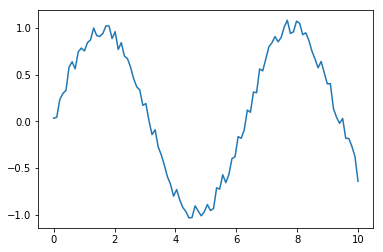

In [14]:
plt.plot(x,y)

<b>Task 6: Interpolation</b><br>
k=10 <br>

* calculate centroids, sigma (you can also use k random centroids, see what happens)
* calculate Hidden layer
* calculate weights
* predict $\hat{y}$
* plot the predicted $\hat{y}$ and actual $y$

In [15]:
#your code goes here.
#print(x)
#print(y)

k=10

def get_random_centroids(k):
    cent={}
    while True:
        ri=np.random.choice(range(len(x)), k)
        if len(set(ri))==k:  #found distinct k indexes.
            for i in range(k):
                cent[i]=x[ri[i]]
            break
    return cent


def euclidianDistance(arr,c):
    return np.sqrt((arr[0]-c[0])**2)



def grouping(cent):
    gpp={}
    for i in range(0,len(cent)):
        gpp[i]=[]
        
    sz = len(x)
    for i in range(sz):
        data = x[i]
        idx,mn=0,9999999.00
        for j in range(0,len(cent)):
            dis=euclidianDistance(data,cent[j])
            if mn>dis:
                mn,idx=dis,j
        gpp[idx].append(data)
        #print(gpp)
    return gpp;


def average(grp):
    sz = len(grp)
    t=0
    for i in range(0,sz):
        t += grp[i]
    c = [t/sz]
    return c


In [16]:

centroids=get_random_centroids(k)

while True:
    gp= grouping(centroids)
    for i in range(0,len(centroids)):
        centroids[i]=average(gp[i])

    new_centroids={}
    gp2=grouping(centroids)
    for i in range(0,len(centroids)):
        new_centroids[i]=average(gp2[i])

    flag=0
    for i,j in zip(centroids,new_centroids):
        if(centroids[i]==new_centroids[j]):
            flag+=1
    if(flag==len(centroids)):
        break


print("\n","For K = ",k,"\n")
print("Ccentroids ->\n\n",centroids)


 For K =  10 

Ccentroids ->

 {0: [array([9.6969697])], 1: [array([5.1010101])], 2: [array([7.07070707])], 3: [array([6.01010101])], 4: [array([4.19191919])], 5: [array([1.91919192])], 6: [array([8.08080808])], 7: [array([0.60606061])], 8: [array([8.93939394])], 9: [array([3.13131313])]}


In [17]:
def distance(c1,c2):
    return np.sqrt((c1[0]-c2[0])**2)

dis=0
for i in range(len(centroids)):
    for j in range(len(centroids)):
        d=distance(centroids[i],centroids[j])
        if(dis<d):
            dis=d
            
print(dis)
sigma=(dis/(np.sqrt(2*k)))
print(sigma)

[9.09090909]
[2.03278907]


In [18]:
def radial_distance(c1,c2):
    return ((c1[0]-c2[0])**2)

G=[]

for i in x:
    h=[]
    for j in centroids:
        #print(i,centroids[j])
        dis=radial_distance(i,centroids[j])
        dis=np.exp((-1*dis)/(2*(sigma**2)))
        h.append(dis[0])
        #print(dis)
    #print(h)
    G.append(h)

G=np.array(G)
print("G shape : ",G.shape)
print()
print(G)

G shape :  (100, 10)

[[1.14470583e-05 4.29183077e-02 2.35931793e-03 1.26426531e-02
  1.19285611e-01 6.40389296e-01 3.70286115e-04 9.56528739e-01
  6.31849483e-05 3.05312403e-01]
 [1.44911084e-05 4.85578213e-02 2.80100281e-03 1.46253347e-02
  1.31993843e-01 6.70320046e-01 4.50596512e-04 9.69607239e-01
  7.85197405e-05 3.29192988e-01]
 [1.82994057e-05 5.48028902e-02 3.31717429e-03 1.68772263e-02
  1.45695774e-01 6.99919379e-01 5.46973003e-04 9.80440728e-01
  9.73356076e-05 3.54066120e-01]
 [2.30515446e-05 6.16986131e-02 3.91877839e-03 1.94278168e-02
  1.60423470e-01 7.29023448e-01 6.62325728e-04 9.88950389e-01
  1.20362805e-04 3.79879480e-01]
 [2.89661481e-05 6.92907095e-02 4.61807292e-03 2.23087171e-02
  1.76204309e-01 7.57465128e-01 8.00027707e-04 9.95073902e-01
  1.48470621e-04 4.06569660e-01]
 [3.63085688e-05 7.76251196e-02 5.42873367e-03 2.55536451e-02
  1.93060226e-01 7.85075562e-01 9.63975726e-04 9.98766194e-01
  1.82690691e-04 4.34061999e-01]
 [4.53999298e-05 8.67475514e-02 6.36

In [19]:
inv_G=np.linalg.pinv(G)
#print(inv_G)
#print(y)
w=np.dot(inv_G,y)
print(w)

[ -20.16541231  154.52246767  148.41232085 -174.66576485  -82.99119144
    4.2252395  -111.13449165   -3.83356967   64.57958201   20.17670103]


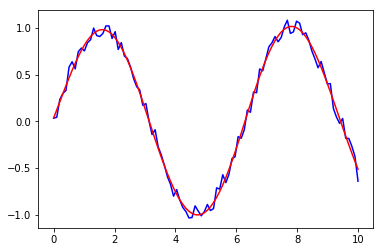

In [20]:
predict_y=np.dot(G,w)

plt.plot(x,y,color='b')

plt.plot(x,predict_y,color='r')

## Task_6 complete...................

<b>Task 7: Test Interpolation </b>

Calculate output for the following, <br>
tx=np.array([4,7,10])  <br>
Output should be near [-0.74,  0.64, -0.55] <br>

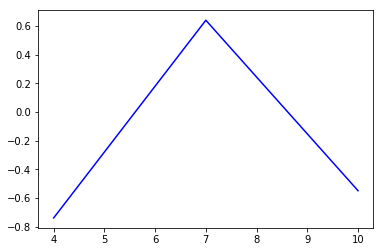

In [21]:
#your code goes here.

tx=np.array([4,7,10])
ty=np.array([-0.74, 0.64, -0.55])

plt.plot(tx,ty,color='b')


In [22]:
def radial_distance(c1,c2):
    return ((c1-c2[0])**2)

G=[]

for i in tx:
    h=[]
    for j in centroids:
        dis=radial_distance(i,centroids[j])
        dis=np.exp((-1*dis)/(2*(sigma**2)))
        h.append(dis[0])
    G.append(h)

G=np.array(G)
print("G shape : ",G.shape)
print()
print(G)

G shape :  (3, 10)

[[1.97005030e-02 8.63571129e-01 3.19519085e-01 6.13299897e-01
  9.95553127e-01 5.92205702e-01 1.33318757e-01 2.48136129e-01
  5.22293276e-02 9.12735959e-01]
 [4.14736827e-01 6.46394242e-01 9.99395245e-01 8.88191504e-01
  3.85149597e-01 4.39999007e-02 8.68189145e-01 7.10627006e-03
  6.34377478e-01 1.63494601e-01]
 [9.88950389e-01 5.48028902e-02 3.54066120e-01 1.45695774e-01
  1.68772263e-02 3.70286115e-04 6.40389296e-01 2.30515446e-05
  8.72745655e-01 3.31717429e-03]]


In [23]:
predict_y=np.dot(G,w)

print(predict_y)

[-0.75659346  0.68051212 -0.51464844]


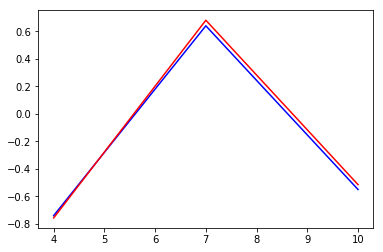

In [24]:
plt.plot(tx,ty,color='b')

plt.plot(tx,predict_y,color='r')

## Task_7 complete...................